In [8]:
import math
!pip install numpy
import numpy as np
!pip install matplotlib
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime as dt
!pip install seaborn
import seaborn as sns
import pandas as pd
from os import listdir
pd.options.display.float_format = '{:.4f}'.format
!pip install geopy
from geopy import distance
from geopy import Point
# import geopandas
# import shapely
# !pip install geopandas
!pip install shapely
!pip install sklearn
from sklearn.linear_model import LinearRegression

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1321 sha256=3113db0dc9e6180fb77050115cd5e234d5f767de2d23d83d27966a596e317634
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [9]:
# routine to read in data
def readData(mpath):
    files = listdir(mpath)
    my_data = pd.DataFrame()
    for f in files:
        # read in next file to process
        file = mpath+f
        fileToRead = open(file, mode='r')
        pr = pd.read_csv(fileToRead)
        # append new file to df
        my_data = my_data.append(pr, sort=False)
        fileToRead.close()
    return my_data 

In [10]:
# find the magnitude to lookup in shock_dt table of distances and times per magnitude for foreshock/aftershock algorithm
# magnitudes are 2.0, 2.5, 3.0, 3.5, etc.
def myfloor(mag):
    return .5 * math.floor(float(mag)/.5)

In [11]:
def fore_after_shocks_distance(df):
    num_records = len(df)
    #shock = np.full(num_records, 'S', np.str) 

    foreshocks = 0
    aftershocks = 0
   # diff = [0]*num_records
   # dist_diff = [0]*num_records
    shock = ['S']*num_records
    for k in range(0, num_records):
        # print('k: ', k)
        after_shock_win = shock_dt[shock_dt['mag']==myfloor(df.iloc[k].mag)].days.iloc[0] # number of days for the aftershock window
        fore_shock_win = after_shock_win/2
        shock_dist_win = shock_dt[shock_dt['mag']==myfloor(df.iloc[k].mag)].km.iloc[0] # kilometers for the aftershock dist window
        
        # identify foreshocks
        if k < num_records-1:
            next = k + 1
            # compute difference to the next record suspicious as mainshock
            diff_next = (df.datetime.iloc[next] - df.datetime.iloc[k]).days
            # diff[k] = diff_next
            dist_diff_next = findDist(df, k, next)
            # dist_diff[k] = dist_diff_next
            while (diff_next <= fore_shock_win) and (shock[k] == 'S') and (next < num_records):
                if (df.iloc[next].mag >= df.iloc[k].mag) and (dist_diff_next <= shock_dist_win):
                # if df.iloc[next].mag >= df.iloc[k].mag:
                    shock[k] = 'F'
                    foreshocks = foreshocks + 1
                else:
                    next = next + 1
                    if next < num_records:
                        diff_next = (df.datetime.iloc[next] - df.datetime.iloc[k]).days
                        dist_diff_next = findDist(df, k, next)
  
        # Identify aftershocks
        if k > 0:
            previous = k-1
            # compute difference to the previous record suspicious as mainshock
            diff_previous = (df.datetime.iloc[k] - df.datetime.iloc[previous]).days
            dist_diff_prev = findDist(df, k, previous)
            while (diff_previous < after_shock_win) and (shock[k] != 'A') and (previous >= 0):
                if (df.iloc[previous].mag > df.iloc[k].mag)  and (dist_diff_prev <= shock_dist_win): 
                    shock[k] = 'A'
                    aftershocks = aftershocks + 1
                else:
                    previous = previous - 1
                    if previous >= 0:
                        # compute difference to the previous suspecious record
                        diff_previous = (df.datetime.iloc[k] - df.datetime.iloc[previous]).days
                        dist_diff_prev = findDist(df, k, previous)
                        
    print("foreshocks: ", foreshocks, "aftershocks", aftershocks, "shock:", shock)
    return shock

In [13]:
# read in table of distances and times per magnitude for foreshock / aftershock algorithm
data_dir = "C:\\Users\\User\\Debbie\\Data\\"
file_path = data_dir + "example_raw_data\\shock_dist_time.csv"
fileToRead = open (file_path, mode='r')
shock_dt = pd.read_csv(fileToRead)
fileToRead.close()

In [15]:
shock_dt

,mag,km,days
0,2.0000,19.5000,6.0000
1,2.5000,19.5000,6.0000
2,3.0000,22.5000,11.5000
3,3.5000,26.0000,22.0000
4,4.0000,30.0000,42.0000
5,4.5000,35.0000,83.0000
6,5.0000,40.0000,155.0000
7,5.5000,47.0000,290.0000
8,6.0000,54.0000,510.0000
9,6.5000,61.0000,790.0000


In [16]:
# round to .1
def mytenths(mag):
    return round(.1 * math.floor(float(mag)/.1), 2)

In [17]:
mytenths(3.34)

3.3

In [18]:
# use geopy to find the distance between 2 points with latitude, longitude

def findDist(df,a,b):
    p1 = Point(df.iloc[a].latitude, df.iloc[a].longitude)
    p2 = Point(df.iloc[b].latitude, df.iloc[b].longitude)
    dist = distance.distance(p1,p2).kilometers
    return dist

In [19]:
def points_from_xy(lat, long):
    return [Point(x, y) for x, y in zip(lat, long)]

In [47]:
# shape file for cyprus
import geopandas
shp_path = data_dir + "shape\\is\\CYP_adm0.shp"
#reading Israel data from shape file
gdf1 = geopandas.read_file(shp_path)

ModuleNotFoundError: No module named 'geopandas'

In [48]:
# shape file for Israel
import geopandas
shp_path = data_dir + "shape\\is\\ISR_adm0.shp"
#reading Israel data from shape file
gdf = geopandas.read_file(shp_path)

ModuleNotFoundError: No module named 'geopandas'

In [49]:
# read all of israel data
file_path = data_dir + "example_raw_data\\cat_1983_2019.csv"
fileToRead = open(file_path, mode='r')
isd = pd.read_csv(fileToRead)
fileToRead.close()
isd['datetime'] = pd.to_datetime(isd[['year', 'month', 'day', 'hour','minute']])
isd['mag'] = isd[["Md", "Mb","Mw"]].max(axis=1)
isd = isd[['datetime','mag','depth','latitude','longitude','region','felt']]
print ('length isd: ', len(isd))
isd.columns

length isd:  23676


Index(['datetime', 'mag', 'depth', 'latitude', 'longitude', 'region', 'felt'], dtype='object')

In [50]:
# 11287 after taking out earthquakes < 2 and those that were 0 (undefined)
isrd = isd[isd['mag']>=2.0]
len(isrd)

11287

In [51]:
isrd.groupby('region')['mag'].count().sort_values(ascending=False)

region
Aragonese-Deep       1832
Cyprus               1537
Eilat-Deep           1498
E.Mediter.Sea        1009
Sinai                 570
Arnona-Dakar-Deep     533
Suez                  510
Dead-Sea-Basin        496
Arava                 435
Lebanon               400
Hula-Kinneret         341
Red-Sea               308
Saudi-Arabia          270
E.Shomron             261
Jordan                213
Roum                  173
Yamune                168
Carmel-Tirza          106
Palmira                87
East-Sinai             75
Iraq                   74
W.Sirhan               60
Jordan-Valley          54
Syria                  53
Galilee                41
Judea-Samaria          39
Northern-Jordan        30
Egypt                  28
Central-Israel         20
Negev                  17
Paran-fault            14
Barak-fault             8
Turkey                  6
Thamad                  6
Sharon                  5
Syria2                  5
------------            2
Arif-fault              2
Gaza 

In [52]:
# took the top 10 regions which is 82% of the data = 19372 / 23676
# Lebanon was not in Marks analysis and and Saudia-Arabia was and isn't included here
# The total is 8820 which is 78% of the earthquakes with magnitude > 2.0
regs = ['Eilat-Deep','Aragonese-Deep','Arava','E.Mediter.Sea','Cyprus','Dead-Sea-Basin','Lebanon',
        'Sinai','Arnona-Dakar-Deep','Suez']
isdr = isrd[isrd['region'].isin(regs)].reset_index(drop=True)
print(len(isdr))
isdr.head()

8820


,datetime,mag,depth,latitude,longitude,region,felt
0,1983-01-06 22:59:00,3.1000,10,34.7505,32.6099,Cyprus,EQ
1,1983-01-07 16:55:00,2.5000,14,31.4101,35.6235,Dead-Sea-Basin,EQ
2,1983-01-13 00:33:00,2.5000,11,31.7611,35.5438,Dead-Sea-Basin,EQ
3,1983-01-21 13:17:00,4.3000,14,29.2855,34.8379,Eilat-Deep,F
4,1983-01-21 17:44:00,2.8000,6,28.7284,34.5545,Aragonese-Deep,EQ


<AxesSubplot:title={'center':'Clusters of Earthquakes in Israel 1983-2019'}, xlabel='region'>

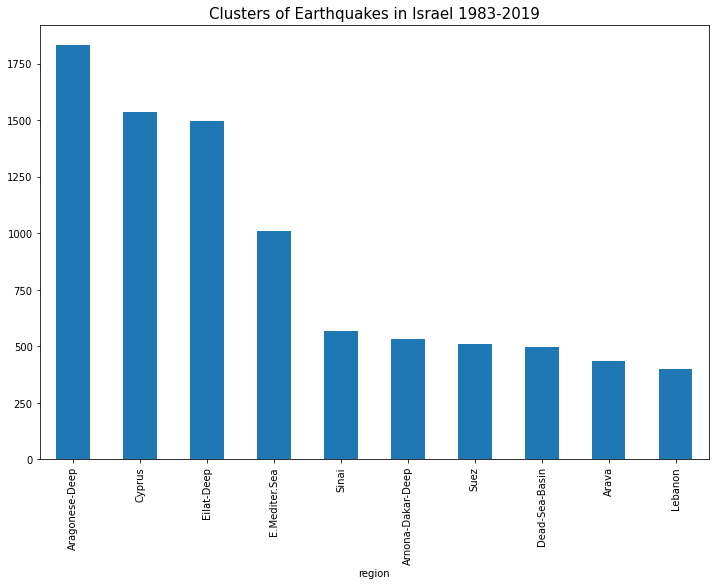

In [53]:
# Plot the number of earthquakes per region
eq = isdr.groupby(['region'])['mag'].count().sort_values(ascending=False)
fig = plt.figure(figsize=(12,8))
plt.title('Clusters of Earthquakes in Israel 1983-2019', fontsize=15)
eq.plot.bar()

In [55]:
# perform forshock / aftershock removal on the california data without noise earthquakes
shocks = fore_after_shocks_distance(isdr)

# put shock labels back into the df
isdr['shocks'] = shocks
file_path = data_dir + "output\\israel_shocks.csv"
# save file to disk
isdr.to_csv(file_path, encoding='utf-8', index=False)

KeyboardInterrupt: 

In [ ]:
# read back in data that was saved to disk
fileToRead = open(file_path, mode='r')
isdr = pd.read_csv(fileToRead)
fileToRead.close()
isdr['datetime'] = pd.to_datetime(isdr['datetime'])

isdr

In [ ]:
isdr[isdr['region']=='Arnona-Dakar-Deep']

In [ ]:
type(isdr['datetime'][0])

In [ ]:
# see how many of each earthquake type: the catalog is reduced to less than 1/4
isdr.groupby('shocks')['mag'].count()